In [69]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

## Abstract

El dataset utilizado está disponible en "Los Angeles Open Data". El mismo abarca los incidentes criminales en Los Ángeles entre los años 2020 y 2023. Cuenta con variables como la distribución geográfica de crímenes, perfiles demográficos de las víctimas y detalles sobre tipos de crímenes, mi motivación es revelar patrones y tendencias significativas para el alto mando de la policía federal de Los Ángeles.

A lo largo de esta exploración, compartiré no solo los resultados, sino también las reflexiones personales que surgen al descifrar estos datos. 

## Hipótesis y preguntas

Se plantea la hipótesis de que la edad y el género de las víctimas de crímenes en Los Ángeles están correlacionados con la naturaleza y la ubicación de los incidentes. Se espera que ciertos grupos demográficos sean más susceptibles a ciertos tipos de crímenes y que la distribución geográfica de los incidentes varíe en función de factores demográficos específicos. Además, se sugiere que la prevalencia de ciertos tipos de crímenes puede variar según la hora del día y la ubicación, afectando a diferentes grupos de edad de manera diferente. Esta hipótesis busca explorar las complejas interacciones entre la demografía de las víctimas y la naturaleza de los crímenes, proporcionando una comprensión más profunda de los patrones subyacentes en los datos de crímenes de Los Ángeles.

1. ¿Existe una correlación entre la edad de las víctimas y la frecuencia de crímenes en áreas específicas de Los Ángeles?
2. ¿Cómo varía la distribución de género de las víctimas según la edad?
3. ¿La hora del día afecta la naturaleza de los crímenes en función de la edad de las víctimas?
4. ¿Cómo se distribuyen los crímenes en relación con la edad de las víctimas y el día de la semana de los incidentes?

Estaré aborando un **problema de regresión**, ya que me gustaría predecir cantidades de crímenes en base a las variables mencionadas.

Mi **variable target** será "Vict Age Group", es una variable que se creará para agrupar a las victimas en dos grupos para hacer un modelo con variable binaria.

**Contexto comercial** La policia de Los Ángeles necesita mejorar su estrategia para brindar la mejor seguridad de todo el país. Para ello, sería interesante, a medida que se va actualizando la información, conocer la cantidad de víctimas según sus características y ubicación de los crímenes para armar de forma mensual la distribución policial adecuada.

**Problema comercial** Como la policía no sabe cuántas víctimas habrá en el futuro, no sabe cómo armar la mejor distribución de sus tropas a lo largo de la ciudad. 

**Contexto analítico** El dataset cuenta con 717,699 reportes de crímenes y las siguientes variables:

- DR_NO = ID del reporte
- Date Rptd = Fecha del reporte
- DATE OCC = Fecha del crimen
- TIME OCC = Hora del crimen
- AREA = ID del área
- AREA NAME = Nombre del área
- Rpt Dist No = Nro que representa una subárea dentro de un Área Geográfica
- Part 1-2 = No se tiene información (identificación de 1 o 2), no se utilizará para el análisis
- Crm Cd = ID del tipo de crimen
- Crm Cd Desc = Descripción del crimen
- Mocodes = Modus Operandi
- Vict Age = Edad de la víctima
- Vict Sex = Sexo de la víctima
- Vict Descent = Descendencia de la víctima
- Premis Cd = ID de la premisa
- Premis Desc = Premisa: tipo de estructura, vehículo o lugar donde ocurrió el delito
- Weapon Used Cd = ID del arma
- Weapon Desc = Descripción del arma
- Status = Estatus del caso
- Status Desc = Descripción del estatus
- Crm Cd 1 = Código de crímen 1 (no se utilizará esta variable)
- Crm Cd 2 = Código de crímen 2 (no se utilizará esta variable)
- Crm Cd 3 = Código de crímen 3 (no se utilizará esta variable)
- Crm Cd 4 = Código de crímen 4 (no se utilizará esta variable)
- LOCATION = Dirección del incidente del crimen redondeada a la centena de cuadra más cercana para mantener el anonimato
- Cross Street = Cruce de calle de dirección redondeada
- LAT = Latitud 
- LON = Longitud


In [2]:
# Importo mi dataset

urls = [
    'https://raw.githubusercontent.com/Jessica-Oshiro/Data-Science/main/parte_1.csv',
    'https://raw.githubusercontent.com/Jessica-Oshiro/Data-Science/main/parte_2.csv',
    'https://raw.githubusercontent.com/Jessica-Oshiro/Data-Science/main/parte_3.csv',
    'https://raw.githubusercontent.com/Jessica-Oshiro/Data-Science/main/parte_4.csv',
    'https://raw.githubusercontent.com/Jessica-Oshiro/Data-Science/main/parte_5.csv',
    'https://raw.githubusercontent.com/Jessica-Oshiro/Data-Science/main/parte_6.csv',
    'https://raw.githubusercontent.com/Jessica-Oshiro/Data-Science/main/parte_7.csv',
    'https://raw.githubusercontent.com/Jessica-Oshiro/Data-Science/main/parte_8.csv'
]

df = pd.concat((pd.read_csv(url) for url in urls), ignore_index=True)

In [3]:
# Conocer cómo identificó Python los datos de mi dataset, es decir, de qué tipo son para ajustarlos en caso de que corresponda

data_types = df.dtypes
print(data_types)

DR_NO               int64
Date Rptd          object
DATE OCC           object
TIME OCC            int64
AREA                int64
AREA NAME          object
Rpt Dist No         int64
Part 1-2            int64
Crm Cd              int64
Crm Cd Desc        object
Mocodes            object
Vict Age            int64
Vict Sex           object
Vict Descent       object
Premis Cd         float64
Premis Desc        object
Weapon Used Cd    float64
Weapon Desc        object
Status             object
Status Desc        object
Crm Cd 1          float64
Crm Cd 2          float64
Crm Cd 3          float64
Crm Cd 4          float64
LOCATION           object
Cross Street       object
LAT               float64
LON               float64
dtype: object


In [4]:
# Voy crear nuevas columnas con el tipo correcto para ajustar las columnas mal identificadas por Python

# Ajuste de las fechas que las toma como objetos

df['Date_Rptd_Correct'] = pd.to_datetime(df['Date Rptd'], infer_datetime_format=True)
df['DATE OCC_Correct'] = pd.to_datetime(df['Date Rptd'], infer_datetime_format=True)

# Ajuste de las horas que las toma como enteros

df['TIME_OCC_Correct'] = df['TIME OCC'].astype(str).str.zfill(4)  # Agrega ceros a la izquierda si es necesario
df['TIME_OCC_Correct'] = df['TIME_OCC_Correct'].str[:2] + ':' + df['TIME_OCC_Correct'].str[2:]
df['TIME_OCC_Correct'] = pd.to_datetime(df['TIME_OCC_Correct'], format='%H:%M', errors='coerce')  # Convertir la columna al tipo de dato de tiempo

# Verifico cómo han quedado mis nuevas columnas

print(df[['Date_Rptd_Correct', 'DATE OCC_Correct', 'TIME_OCC_Correct']].dtypes)



C:\Users\Maxi\AppData\Local\Temp\ipykernel_3076\284583962.py:5: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Date_Rptd_Correct'] = pd.to_datetime(df['Date Rptd'], infer_datetime_format=True)
C:\Users\Maxi\AppData\Local\Temp\ipykernel_3076\284583962.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date_Rptd_Correct'] = pd.to_datetime(df['Date Rptd'], infer_datetime_format=True)
C:\Users\Maxi\AppData\Local\Temp\ipykernel_3076\284583962.py:6: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0

Date_Rptd_Correct    datetime64[ns]
DATE OCC_Correct     datetime64[ns]
TIME_OCC_Correct     datetime64[ns]
dtype: object


In [5]:
# Reviso qué información tiene mi variable 'Vict Age'

age_min = df['Vict Age'].min()
age_max = df['Vict Age'].max()
print(f"Age Min: {age_min}")
print(f"Age Max: {age_max}")

Age Min: -2
Age Max: 120


In [6]:
# Veo cuántos registros implican esos valores atípicos

minimum_age_count = df.loc[df['Vict Age'] == age_min].shape[0]
maximum_age_count = df.loc[df['Vict Age'] == age_max].shape[0]

# Mostrar los valores y sus conteos
print(f"Age Min: {age_min} - Quantity: {minimum_age_count}")
print(f"Age Max: {age_max} - Quantity: {maximum_age_count}")

Age Min: -2 - Quantity: 8
Age Max: 120 - Quantity: 1


In [7]:
# Se podría considerar que esos 8 registros con edad -2 pueden ser fetos, por lo cual, para homogeneizar voy a reemplazarlos por el valor 0 y como la edad 120 es un solo registro, voy a eliminarlo y veo cuáles son mis nuevo extremos

df = df.loc[df['Vict Age'] <= 100]
df.loc[df['Vict Age'] < 1, 'Vict Age'] = 1

new_minimum_value = df['Vict Age'].min()
new_maximum_value = df['Vict Age'].max()

print(f"New values': {new_minimum_value}, {new_maximum_value}")



New values': 1, 99


In [8]:
# Creo mi variable target binaria

df['Vict Age Group'] = pd.cut(df['Vict Age'], bins=[0, 18, float('inf')], labels=['Children/Teens', 'Adults/Seniors'])

print(df[['Vict Age','Vict Age Group']])

        Vict Age  Vict Age Group
0             36  Adults/Seniors
1             25  Adults/Seniors
2              1  Children/Teens
3             76  Adults/Seniors
4             31  Adults/Seniors
...          ...             ...
717695        23  Adults/Seniors
717696        25  Adults/Seniors
717697        29  Adults/Seniors
717698        20  Adults/Seniors
717699        53  Adults/Seniors

[717699 rows x 2 columns]


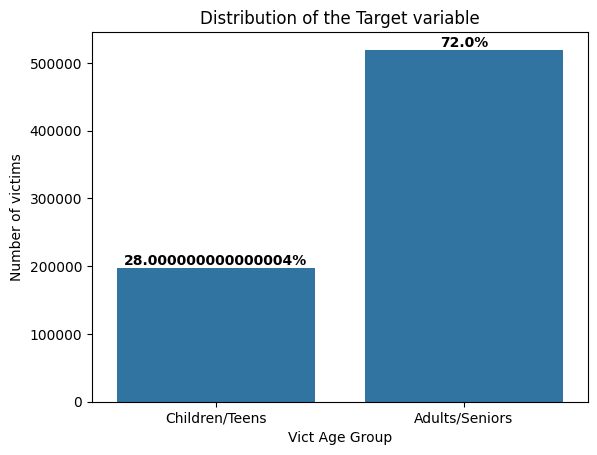

In [9]:
cantidad = len(df['Vict Age Group'])

sns.countplot(data = df,
              x = "Vict Age Group")
plt.xlabel('Vict Age Group')
plt.ylabel('Number of victims')
plt.title('Distribution of the Target variable')
ax = plt.gca()
for p in ax.patches:
    x_text = p.get_x() + p.get_width() / 2.0  # Calcula la posición x del texto
    y_text = p.get_height()  # Toma la altura de la columna
    ax.text(x_text, y_text, f'{str(round(int(y_text)/cantidad,2) * 100)}%', # Indica posición x e y, y texto a mostrar 
            ha = 'center', # Alineación horizontal 
            va = 'bottom',  # Alineación vertical
            fontsize = 10, color = 'black', fontweight = 'bold')
plt.show()

## 1. ¿Existe una correlación entre la edad de las víctimas y los crímenes en áreas específicas de Los Ángeles?

Se sigue haciendo evidente que el mayor grupo afectado es el de adultos y ancianos, y en donde en "Central" es donde se encuentra más concentrado los crímenes.

In [10]:
# Reviso qué información tiene mi variable AREA NAME

print(df['AREA NAME'].unique())


['Southwest' 'Central' 'N Hollywood' 'Mission' 'Devonshire' 'Northeast'
 'Harbor' 'Van Nuys' 'West Valley' 'West LA' 'Wilshire' 'Pacific'
 'Rampart' '77th Street' 'Hollenbeck' 'Southeast' 'Hollywood' 'Newton'
 'Foothill' 'Olympic' 'Topanga']


In [11]:
# Voy a realizar una agrupación para que mis gráficos no sean tan grandes

area_mapping = {
    'Southwest': 'West',
    'Central': 'Central',
    'N Hollywood': 'North',
    'Mission': 'North',
    'Devonshire': 'North',
    'Northeast': 'North',
    'Harbor': 'South',
    'Van Nuys': 'North',
    'West Valley': 'West',
    'West LA': 'West',
    'Wilshire': 'Central',
    'Pacific': 'South',
    'Rampart': 'Central',
    '77th Street': 'South',
    'Hollenbeck': 'Central',
    'Southeast': 'South',
    'Hollywood': 'Central',
    'Newton': 'Central',
    'Foothill': 'North',
    'Olympic': 'Central',
    'Topanga': 'West'
}

df['Area_Grouped'] = df['AREA NAME'].map(area_mapping) # Creo una nueva columna con áreas agrupadas


In [12]:
# Verifico cantidades

total_area = df['AREA NAME'].count()
total_area_grouped = df['Area_Grouped'].count()
total_vict_age = df['Vict Age'].count()
total_vict_age_group = df['Vict Age Group'].count()

print("Total de la columna 'AREA NAME':", total_area)
print("Total de la columna 'Area_Grouped':", total_area_grouped)
print("Total de la columna 'Vict Age':", total_vict_age)
print("Total de la columna 'Vict Age Group':", total_vict_age_group)

Total de la columna 'AREA NAME': 717699
Total de la columna 'Area_Grouped': 717699
Total de la columna 'Vict Age': 717699
Total de la columna 'Vict Age Group': 717699


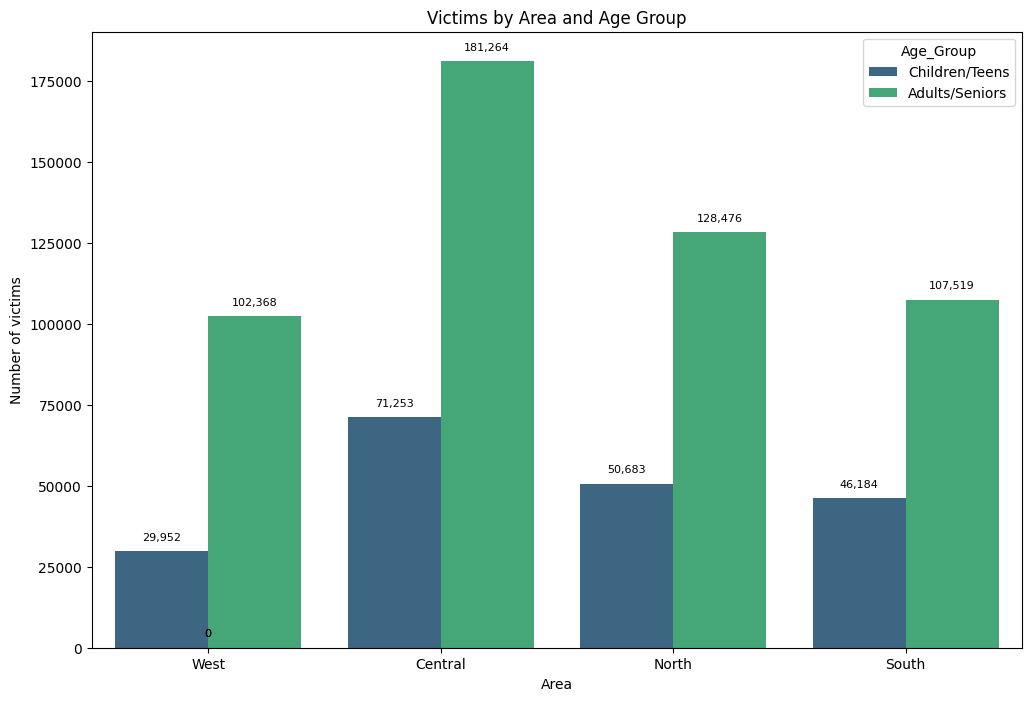

In [13]:
#Grafico

plt.figure(figsize=(12, 8))
ax = sns.countplot(data=df, x='Area_Grouped', hue='Vict Age Group', palette='viridis')

for p in ax.patches:
    count_text = '{:,}'.format(int(p.get_height())) 
    ax.annotate(count_text, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)


plt.title('Victims by Area and Age Group')
plt.xlabel('Area')
plt.ylabel('Number of victims')
plt.legend(title='Age_Group')

plt.show()

# 2. ¿Cómo varía la distribución de género de las víctimas según la edad?

Se sigue demostrando que el mayor grupo afectado es el de adultos y ancianos, y en cuanto al género, es poca la diferencia que exite entre víctimas femeninas y masculinas.

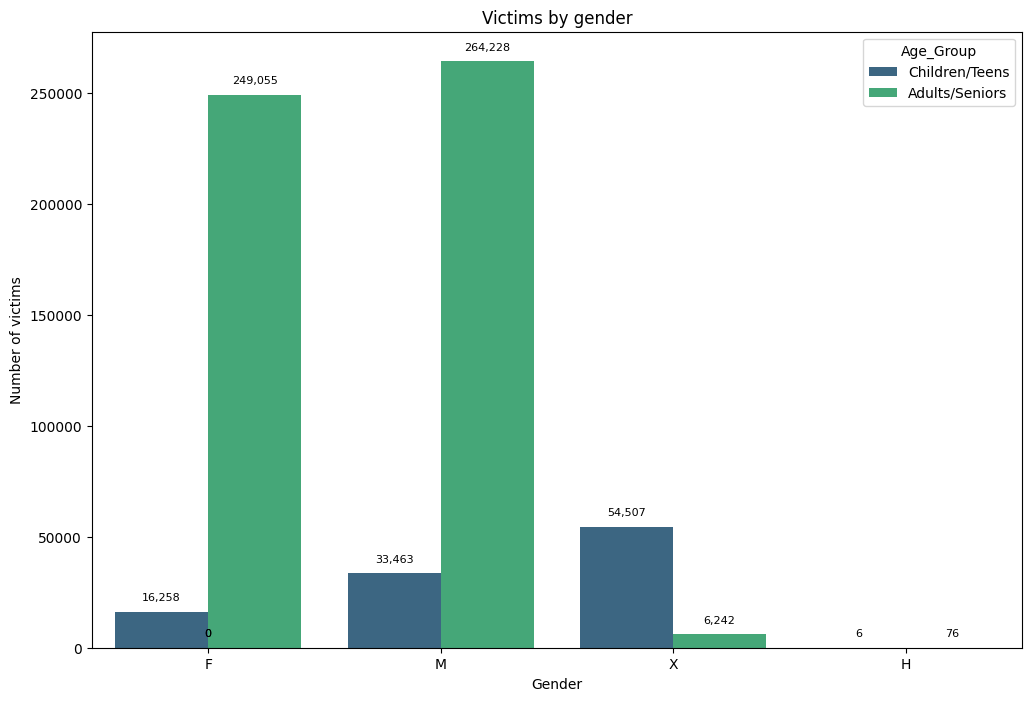

In [14]:
#Grafico

plt.figure(figsize=(12, 8))
ax = sns.countplot(data=df, x='Vict Sex', hue='Vict Age Group', palette='viridis')

for p in ax.patches:
    count_text = '{:,}'.format(int(p.get_height())) 
    ax.annotate(count_text, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)


plt.title('Victims by gender')
plt.xlabel('Gender')
plt.ylabel('Number of victims')
plt.legend(title='Age_Group')

plt.show()

## 3. ¿La hora del día afecta la naturaleza de los crímenes en función de la edad de las víctimas?

Se reafirma que el grupo de víctimas destacado es el de adultos + ancianos, y se puede observar que el momento del día en donde pueden llegar a sufrir un accidente es durante la noche.

In [15]:
# Voy a realizar una agrupación para que mis gráficos no sean tan grandes

df['Time_Class'] = pd.cut(df['TIME_OCC_Correct'].dt.hour,
                          bins=[0, 6, 12, 18, 24],
                          labels=['Night', 'Morning', 'Afternoon', 'Night'],
                          include_lowest=True,
                          ordered=False)

# Mostrar el DataFrame resultante
print(df[['TIME_OCC_Correct', 'Time_Class']])

          TIME_OCC_Correct Time_Class
0      1900-01-01 22:30:00      Night
1      1900-01-01 03:30:00      Night
2      1900-01-01 12:00:00    Morning
3      1900-01-01 17:30:00  Afternoon
4      1900-01-01 04:15:00      Night
...                    ...        ...
717695 1900-01-01 18:00:00  Afternoon
717696 1900-01-01 10:00:00    Morning
717697 1900-01-01 16:30:00  Afternoon
717698 1900-01-01 13:30:00  Afternoon
717699 1900-01-01 09:00:00    Morning

[717699 rows x 2 columns]


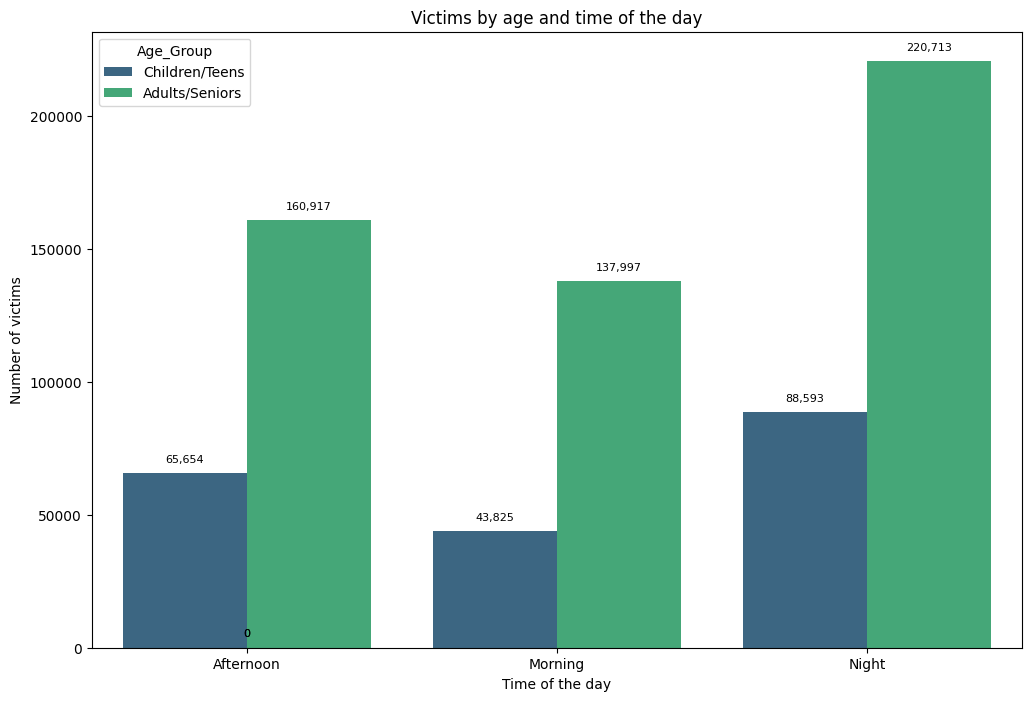

In [16]:
#Grafico

plt.figure(figsize=(12, 8))
ax = sns.countplot(data=df, x='Time_Class', hue='Vict Age Group', palette='viridis')

for p in ax.patches:
    count_text = '{:,}'.format(int(p.get_height())) 
    ax.annotate(count_text, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)


plt.title('Victims by age and time of the day')
plt.xlabel('Time of the day')
plt.ylabel('Number of victims')
plt.legend(title='Age_Group')

plt.show()

## 4. ¿Cómo se distribuyen los crímenes en relación con la edad de las víctimas y el día de la semana de los incidentes?

El lunes es el día en donde hay más crímenes y los adultos + ancianos son los más afectados, entonces en base a esto, se podría recomendar que se tomen más medidas de seguridad en dicho día y, en base al gráfico anterior, más especificamente durante el turno noche.

In [17]:
# Creo una columna que me diga el día de la semana

df['DATE OCC_Correct'] = pd.to_datetime(df['DATE OCC_Correct']) 
df['Day_of_Week'] = df['DATE OCC_Correct'].dt.day_name()

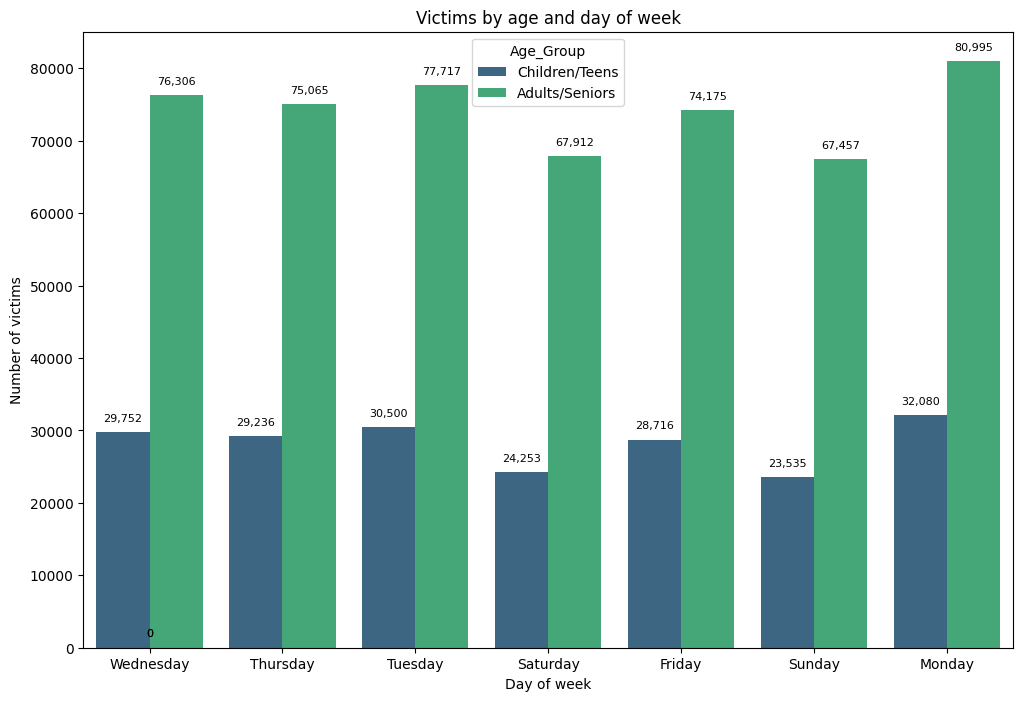

In [18]:
# Grafico

plt.figure(figsize=(12, 8))
ax = sns.countplot(data=df, x='Day_of_Week', hue='Vict Age Group', palette='viridis')

for p in ax.patches:
    count_text = '{:,}'.format(int(p.get_height())) 
    ax.annotate(count_text, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)


plt.title('Victims by age and day of week')
plt.xlabel('Day of week')
plt.ylabel('Number of victims')
plt.legend(title='Age_Group')

plt.show()

# Exploración valores vacíos

In [19]:
valores_nulos  = df.isnull().sum()
columnas_con_nulos = valores_nulos[valores_nulos > 0]
print('Cantidad de columnas con valores vacíos:')
print(columnas_con_nulos.shape)
print('')
print('Variables con valores vacíos: ')
print(columnas_con_nulos.sort_values(ascending=False))

Cantidad de columnas con valores vacíos:
(12,)

Variables con valores vacíos: 
Crm Cd 4          717645
Crm Cd 3          715913
Crm Cd 2          664374
Cross Street      601766
Weapon Used Cd    468593
Weapon Desc       468593
Mocodes            98453
Vict Descent       93870
Vict Sex           93864
Premis Desc          398
Premis Cd              8
Crm Cd 1               8
dtype: int64


In [20]:
# Reviso los datos de la columna 

print(df['Vict Sex'].unique())

['F' 'M' 'X' nan 'H']


In [21]:
nan_count = df['Vict Sex'].isna().sum()
h_count = (df['Vict Sex'] == 'H').sum()

print(f"Cantidad de registros con 'Vict Sex' como NaN: {nan_count}")
print(f"Cantidad de registros con 'Vict Sex' igual a 'H': {h_count}")

Cantidad de registros con 'Vict Sex' como NaN: 93864
Cantidad de registros con 'Vict Sex' igual a 'H': 82


Adicional a los vacios, me llama la atención también la categoría H. Según la página en donde es posible descargar el dataset y obetener información de las columnas, para la columna "Vict Sex" solo se debería admitir las letras F = Female, M = Male y X = Unknown. Dado que no hay más infomración al respecto voy a optar por rellenar estos valores con la moda.

Total de registros 717,699

H = 0.01%
NaN = 13.07%

In [22]:
df['Vict Sex'] = df['Vict Sex'].replace('H', np.nan)

# Imprimir el DataFrame con la modificación
print(df[['Vict Sex']])

       Vict Sex
0             F
1             M
2             X
3             F
4             X
...         ...
717695        M
717696        F
717697        M
717698        F
717699        F

[717699 rows x 1 columns]


In [23]:
mode_vict_sex = df['Vict Sex'].mode()[0]
df['Vict Sex'].fillna(mode_vict_sex, inplace=True)

In [24]:
print(df['Vict Sex'].isnull().sum())

0


Aplico el mismo método para las columnas "Vict Descent" y "Weapon Desc" . Por el momento son las columnas que considero útil, el resto no las usaré para mi análisis.

In [25]:
mode_vict_des = df['Vict Descent'].mode()[0]
df['Vict Descent'].fillna(mode_vict_des, inplace=True)

In [26]:
print(df['Vict Descent'].isnull().sum())

0


In [27]:
mode_weapon_desc = df['Weapon Desc'].mode()[0]
df['Weapon Desc'].fillna(mode_weapon_desc, inplace=True)

In [28]:
print(df['Weapon Desc'].isnull().sum())

0


## Variables Crime_Grouped, Variable Descent_Grouped y Weapon_Grouped

Voy a trabajar estas features para poder usarlas más adelante.

In [29]:
# Creo la agrupación de crime desc para no tener tantas opciones

crime_mapping = {
   
    'CRIMINAL HOMICIDE': 'Major Crime',
    'MANSLAUGHTER, NEGLIGENT' :'Major Crime',
    'RAPE, FORCIBLE' : 'Major Crime',
    'RAPE, ATTEMPTED' : 'Major Crime',
    'ROBBERY' : 'Moderate Crime',
    'ATTEMPTED ROBBERY' : 'Minor Crime',
    'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT' : 'Major Crime', 
    'ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER' : 'Major Crime',
    'CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT' : 'Major Crime',
    'INTIMATE PARTNER - AGGRAVATED ASSAULT' : 'Moderate Crime',
    'CHILD NEGLECT (SEE 300 W.I.C.)' : 'Moderate Crime',
    'SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT' : 'Moderate Crime',
    'SHOTS FIRED AT INHABITED DWELLING' : 'Moderate Crime',
    'BURGLARY' : 'Minor Crime',
    'BURGLARY, ATTEMPTED' : 'Minor Crime',
    'BURGLARY FROM VEHICLE' : 'Minor Crime',
    'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)' : 'Minor Crime',
    'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD' : 'Moderate Crime',
    'SHOPLIFTING-GRAND THEFT ($950.01 & OVER)' : 'Moderate Crime',
    'DISHONEST EMPLOYEE - GRAND THEFT' : 'Minor Crime',
    'GRAND THEFT / INSURANCE FRAUD' : 'Minor Crime',
    'GRAND THEFT / AUTO REPAIR' : 'Minor Crime',
    'THEFT, PERSON' : 'Minor Crime',
    'PURSE SNATCHING' : 'Minor Crime',
    'PICKPOCKET' : 'Minor Crime',
    'DRUNK ROLL' : 'Minor Crime',
    'THEFT OF IDENTITY' : 'Moderate Crime',
    'BURGLARY FROM VEHICLE, ATTEMPTED' : 'Minor Crime',
    'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)' : 'Minor Crime',
    'THEFT FROM MOTOR VEHICLE - ATTEMPT' : 'Minor Crime',
    'BLOCKING DOOR INDUCTION CENTER' : 'Minor Crime',
    'DRIVING WITHOUT OWNER CONSENT (DWOC)' : 'Minor Crime',
    'FALSE IMPRISONMENT' : 'Minor Crime',
    'LYNCHING' : 'Moderate Crime',
    'LYNCHING - ATTEMPTED' : 'Minor Crime',
    'RESISTING ARREST' : 'Minor Crime',
    'RECKLESS DRIVING' : 'Minor Crime',
    'FALSE POLICE REPORT' : 'Minor Crime',
    'THEFT PLAIN - PETTY ($950 & UNDER)' : 'Minor Crime',
    'THEFT PLAIN - ATTEMPT' : 'Minor Crime',
    'SHOPLIFTING - PETTY THEFT ($950 & UNDER)' : 'Minor Crime',
    'SHOPLIFTING - ATTEMPT' : 'Minor Crime',
    'DISHONEST EMPLOYEE - PETTY THEFT' : 'Minor Crime',
    'DISHONEST EMPLOYEE ATTEMPTED THEFT' : 'Minor Crime',
    'PETTY THEFT - AUTO REPAIR' : 'Minor Crime',
    'THEFT FROM PERSON - ATTEMPT' : 'Minor Crime',
    'PURSE SNATCHING - ATTEMPT' : 'Minor Crime',
    'PICKPOCKET, ATTEMPT' : 'Minor Crime',
    'TILL TAP - GRAND THEFT ($950.01 & OVER)' : 'Minor Crime',
    'TILL TAP - PETTY ($950 & UNDER)' : 'Minor Crime',
    'THEFT, COIN MACHINE - GRAND ($950.01 & OVER)' : 'Minor Crime',
    'THEFT, COIN MACHINE - PETTY ($950 & UNDER)' : 'Minor Crime',
    'THEFT, COIN MACHINE - ATTEMPT' : 'Minor Crime',
    'BIKE - STOLEN' : 'Minor Crime',
    'BIKE - ATTEMPTED STOLEN' : 'Minor Crime',
    'BOAT - STOLEN' : 'Moderate Crime',
    'VEHICLE - STOLEN' : 'Moderate Crime',
    'VEHICLE - ATTEMPT STOLEN' : 'Minor Crime',
    'VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)' : 'Minor Crime',
    'BATTERY ON A FIREFIGHTER' : 'Minor Crime',
    'BATTERY POLICE (SIMPLE)' : 'Minor Crime',
    'BATTERY - SIMPLE ASSAULT' : 'Minor Crime',
    'OTHER ASSAULT' : 'Moderate Crime',
    'INTIMATE PARTNER - SIMPLE ASSAULT' : 'Minor Crime',
    'CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT' : 'Moderate Crime',
    'THROWING OBJECT AT MOVING VEHICLE' : 'Minor Crime',
    'ARSON' : 'Moderate Crime',
    'DOCUMENT FORGERY / STOLEN FELONY' : 'Moderate Crime',
    'DOCUMENT WORTHLESS ($200.01 & OVER)' : 'Moderate Crime',
    'DOCUMENT WORTHLESS ($200 & UNDER)' : 'Minor Crime',
    'CREDIT CARDS, FRAUD USE ($950.01 & OVER)' : 'Moderate Crime',
    'CREDIT CARDS, FRAUD USE ($950 & UNDER' : 'Minor Crime',
    'COUNTERFEIT' : 'Moderate Crime',
    'UNAUTHORIZED COMPUTER ACCESS' : 'Moderate Crime',
    'BUNCO, GRAND THEFT' : 'Moderate Crime',
    'BUNCO, PETTY THEFT' : 'Minor Crime',
    'BUNCO, ATTEMPT' : 'Minor Crime',
    'EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)' : 'Moderate Crime',
    'EMBEZZLEMENT, PETTY THEFT ($950 & UNDER)' : 'Minor Crime',
    'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)' : 'Moderate Crime',
    'VANDALISM - MISDEAMEANOR ($399 OR UNDER)' : 'Minor Crime',
    'DISCHARGE FIREARMS/SHOTS FIRED' : 'Moderate Crime',
    'BOMB SCARE' : 'Moderate Crime',
    'WEAPONS POSSESSION/BOMBING' : 'Moderate Crime',
    'LEWD/LASCIVIOUS ACTS WITH CHILD' : 'Moderate Crime',
    'BRANDISH WEAPON' : 'Minor Crime',
    'LEWD CONDUCT' : 'Moderate Crime',
    'STALKING' : 'Minor Crime',
    'PIMPING' : 'Major Crime',
    'PANDERING' : 'Minor Crime', 
    'SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ' : 'Major Crime',
    'CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)' : 'Major Crime',
    'CHILD ANNOYING (17YRS & UNDER)' : 'Minor Crime', 
    'CHILD PORNOGRAPHY' : 'Moderate Crime',
    'SEXUAL PENETRATION W/FOREIGN OBJECT' : 'Moderate Crime',
    'ORAL COPULATION' : 'Moderate Crime',
    'SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH' : 'Moderate Crime',
    'HUMAN TRAFFICKING - COMMERCIAL SEX ACTS' : 'Major Crime',
    'INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES)' : 'Moderate Crime',
    'BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM' : 'Major Crime',
    'SEX OFFENDER REGISTRANT OUT OF COMPLIANCE' : 'Moderate Crime',
    'INDECENT EXPOSURE' : 'Minor Crime', 
    'BATTERY WITH SEXUAL CONTACT' : 'Moderate Crime',
    'DRUGS, TO A MINOR' : 'Moderate Crime',
    'CHILD ABANDONMENT' : 'Moderate Crime',
    'DISRUPT SCHOOL' : 'Minor Crime', 
    'INCITING A RIOT' : 'Minor Crime', 
    'FAILURE TO DISPERSE' : 'Minor Crime', 
    'DISTURBING THE PEACE' : 'Minor Crime', 
    'TRESPASSING' : 'Minor Crime', 
    'FAILURE TO YIELD' : 'Minor Crime', 
    'VIOLATION OF COURT ORDER' : 'Moderate Crime',
    'VIOLATION OF RESTRAINING ORDER' : 'Moderate Crime',
    'VIOLATION OF TEMPORARY RESTRAINING ORDER' : 'Moderate Crime',
    'CONTEMPT OF COURT' : 'Moderate Crime',
    'FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)' : 'Moderate Crime',
    'FIREARMS RESTRAINING ORDER (FIREARMS RO)' : 'Moderate Crime',
    'KIDNAPPING' : 'Major Crime',
    'KIDNAPPING - GRAND ATTEMPT' : 'Major Crime',
    'HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE' : 'Major Crime',
    'CHILD STEALING' : 'Major Crime',
    'TELEPHONE PROPERTY - DAMAGE' : 'Minor Crime', 
    'THREATENING PHONE CALLS/LETTERS' : 'Moderate Crime',
    'CRIMINAL THREATS - NO WEAPON DISPLAYED' : 'Moderate Crime',
    'REPLICA FIREARMS(SALE,DISPLAY,MANUFACTURE OR DISTRIBUTE)' : 'Moderate Crime',
    'PEEPING TOM' : 'Minor Crime', 
    'PROWLER' : 'Minor Crime', 
    'EXTORTION': 'Minor Crime', 
    'BRIBERY' : 'Minor Crime',
    'CRUELTY TO ANIMALS' : 'Moderate Crime',
    'CONSPIRACY' : 'Moderate Crime',
    'OTHER MISCELLANEOUS CRIME' : 'Moderate Crime',
    'BIGAMY' : 'Minor Crime',
    'ILLEGAL DUMPING' : 'Moderate Crime',
    'DEFRAUDING INNKEEPER/THEFT OF SERVICES, OVER $950.01' : 'Moderate Crime',
    'DEFRAUDING INNKEEPER/THEFT OF SERVICES, $950 & UNDER' : 'Moderate Crime',
    'CONTRIBUTING' : 'Minor Crime',
    'LETTERS, LEWD  -  TELEPHONE CALLS, LEWD' : 'Minor Crime',
}

df['Crime_Grouped'] = df['Crm Cd Desc'].map(crime_mapping) # Creo una nueva columna con áreas agrupadas

In [30]:
# Reviso los valores únicos que contiene la variale "Vict Descent"

print(df['Vict Descent'].unique())

['B' 'H' 'X' 'W' 'A' 'O' 'C' 'F' 'K' 'I' 'V' 'Z' 'J' 'P' 'G' 'U' 'D' 'S'
 'L' '-']


In [31]:
# Cuento cuántos valores tiene cada clasificación

conteo_valores = df['Vict Descent'].value_counts()
print(conteo_valores)

Vict Descent
H    314440
W    147580
B    103271
X     67462
O     56683
A     15629
K      3767
F      2950
C      2663
J       991
V       709
I       692
Z       349
P       187
U       142
D        50
G        49
L        44
S        40
-         1
Name: count, dtype: int64


In [32]:
# Voy a reemplazar las letras por su significado para entender mejor a qué nos referimos cuando las analicemos

reemplazos = {'B': 'Black', 
              'H': 'Hispanic/Latin/Mexican', 
              'X': 'Unknown',
              'W': 'White',
              'A': 'Other Asian',
              'O': 'Other',
              'C': 'Chinese',
              'F': 'Filipino',
              'K': 'Korean',
              'I': 'American Indian/Alaskan Native',
              'V': 'Vietnamese',
              'Z': 'Asian Indian',
              'J': 'Japanese',
              'P': 'Pacific Islander',
              'G': 'Guamanian',
              'U': 'Hawaiian',
              'D': 'Cambodian',
              'S': 'Samoan',
              'L': 'Laotian',
              '-': 'Unknown',}
df['Vict Descent'] = df['Vict Descent'].replace(reemplazos)



In [33]:
# Creo la agrupación de vict descent para no tener tantas opciones

descent_mapping = {
   
    'Hispanic/Latin/Mexican': 'Main Ethnic Groups',
    'White' :'Main Ethnic Groups',
    'Black' : 'Main Ethnic Groups',
    'Unknown' : 'Unknown or Not Specified',
    'Other' : 'Unknown or Not Specified',
    'Other Asian' : 'Other Ethnic Minorities',
    'Korean' : 'Other Ethnic Minorities',
    'Filipino' : 'Other Ethnic Minorities',
    'Chinese' : 'Other Ethnic Minorities',
    'Japanese' : 'Other Ethnic Minorities',
    'Vietnamese' : 'Other Ethnic Minorities',
    'American Indian/Alaskan Native' : 'Other Ethnic Minorities',
    'Asian Indian' : 'Other Ethnic Minorities',
    'Pacific Islander' : 'Other Ethnic Minorities',
    'Hawaiian' : 'Other Ethnic Minorities',
    'Cambodian' : 'Other Ethnic Minorities',
    'Guamanian' : 'Other Ethnic Minorities',
    'Laotian' : 'Other Ethnic Minorities',
    'Samoan' : 'Other Ethnic Minorities',
}

df['Descent_Grouped'] = df['Vict Descent'].map(descent_mapping) # Creo una nueva columna con áreas agrupadas

In [34]:
# Reviso los valores únicos que contiene la variale "Weapon Desc"

print(df['Weapon Desc'].unique())

['STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)'
 'UNKNOWN WEAPON/OTHER WEAPON' 'ROCK/THROWN OBJECT' 'VERBAL THREAT'
 'FOLDING KNIFE' 'BLUNT INSTRUMENT' 'BOTTLE' 'SEMI-AUTOMATIC PISTOL'
 'CLUB/BAT' 'OTHER CUTTING INSTRUMENT' 'HAND GUN' 'PHYSICAL PRESENCE'
 'VEHICLE' 'SCISSORS' 'STICK' 'MACHETE' 'OTHER KNIFE' 'SHOTGUN' 'ICE PICK'
 'KNIFE WITH BLADE 6INCHES OR LESS' 'FIRE' 'GLASS' 'SIMULATED GUN'
 'KNIFE WITH BLADE OVER 6 INCHES IN LENGTH' 'DEMAND NOTE' 'BOMB THREAT'
 'PIPE/METAL PIPE' 'UNKNOWN FIREARM' 'MACE/PEPPER SPRAY' 'HAMMER' 'RAZOR'
 'OTHER FIREARM' 'BELT FLAILING INSTRUMENT/CHAIN'
 'UNKNOWN TYPE CUTTING INSTRUMENT' 'SCREWDRIVER' 'KITCHEN KNIFE'
 'AIR PISTOL/REVOLVER/RIFLE/BB GUN' 'BRASS KNUCKLES' 'REVOLVER'
 'SWITCH BLADE' 'STUN GUN' 'AXE' 'RIFLE' 'ASSAULT WEAPON/UZI/AK47/ETC'
 'ANTIQUE FIREARM' 'FIXED OBJECT' 'SEMI-AUTOMATIC RIFLE'
 'CAUSTIC CHEMICAL/POISON' 'TIRE IRON' 'MARTIAL ARTS WEAPONS'
 'CONCRETE BLOCK/BRICK' 'BOARD' 'DIRK/DAGGER' 'TOY GUN'
 'MAC-11 SEMIAUTOMATIC ASSAULT

In [35]:
# Creo la agrupación de weapon desc para no tener tantas opciones

weapon_mapping = {
   
    'STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)' : 'Others',
    'UNKNOWN WEAPON/OTHER WEAPON' : 'Others',
    'nan' : 'Others',
    'ROCK/THROWN OBJECT' : 'Others', 
    'VERBAL THREAT' : 'Others',
    'FOLDING KNIFE' : 'Ropes/Sharp Weapons', 
    'BLUNT INSTRUMENT' : 'Ropes/Sharp Weapons',  
    'BOTTLE' : 'Others', 
    'SEMI-AUTOMATIC PISTOL': 'Firearms',
    'CLUB/BAT' : 'Ropes/Sharp Weapons',  
    'OTHER CUTTING INSTRUMENT' : 'Ropes/Sharp Weapons', 
    'HAND GUN' : 'Firearms', 
    'PHYSICAL PRESENCE' : 'Others',
    'VEHICLE' : 'Others', 
    'SCISSORS' : 'Ropes/Sharp Weapons', 
    'STICK' : 'Ropes/Sharp Weapons', 
    'MACHETE' : 'Ropes/Sharp Weapons',
    'OTHER KNIFE' : 'Ropes/Sharp Weapons', 
    'SHOTGUN' : 'Firearms', 
    'ICE PICK' : 'Others',
    'KNIFE WITH BLADE 6INCHES OR LESS' : 'Ropes/Sharp Weapons', 
    'FIRE' : 'Others', 
    'GLASS' : 'Ropes/Sharp Weapons',  
    'SIMULATED GUN' : 'Others', 
    'KNIFE WITH BLADE OVER 6 INCHES IN LENGTH' : 'Ropes/Sharp Weapons',  
    'DEMAND NOTE' : 'Others', 
    'BOMB THREAT' : 'Others',
    'PIPE/METAL PIPE' : 'Others', 
    'UNKNOWN FIREARM' : 'Firearms', 
    'MACE/PEPPER SPRAY' : 'Others',  
    'HAMMER' : 'Ropes/Sharp Weapons',  
    'RAZOR' : 'Ropes/Sharp Weapons', 
    'OTHER FIREARM' : 'Firearms', 
    'BELT FLAILING INSTRUMENT/CHAIN' : 'Ropes/Sharp Weapons',
    'UNKNOWN TYPE CUTTING INSTRUMENT' : 'Ropes/Sharp Weapons', 
    'SCREWDRIVER' : 'Ropes/Sharp Weapons',
    'KITCHEN KNIFE' : 'Ropes/Sharp Weapons',
    'AIR PISTOL/REVOLVER/RIFLE/BB GUN' : 'Firearms', 
    'BRASS KNUCKLES' : 'Ropes/Sharp Weapons', 
    'REVOLVER' : 'Firearms', 
    'SWITCH BLADE' : 'Ropes/Sharp Weapons',
    'STUN GUN' : 'Others',   
    'AXE' : 'Ropes/Sharp Weapons', 
    'RIFLE' : 'Firearms',
    'ASSAULT WEAPON/UZI/AK47/ETC' : 'Firearms',
    'ANTIQUE FIREARM' : 'Firearms', 
    'FIXED OBJECT' : 'Others',
    'SEMI-AUTOMATIC RIFLE' : 'Firearms', 
    'CAUSTIC CHEMICAL/POISON' : 'Others', 
    'TIRE IRON' : 'Ropes/Sharp Weapons', 
    'MARTIAL ARTS WEAPONS' : 'Ropes/Sharp Weapons',
    'CONCRETE BLOCK/BRICK' : 'Others', 
    'BOARD' : 'Others', 
    'DIRK/DAGGER' : 'Ropes/Sharp Weapons', 
    'TOY GUN' : 'Others', 
    'MAC-11 SEMIAUTOMATIC ASSAULT WEAPON' : 'Firearms',
    'EXPLOXIVE DEVICE' : 'Others', 
    'HECKLER & KOCH 93 SEMIAUTOMATIC ASSAULT RIFLE' : 'Firearms', 
    'SAWED OFF RIFLE/SHOTGUN' : 'Firearms',
    'DOG/ANIMAL (SIC ANIMAL ON)' : 'Others', 
    'SYRINGE' : 'Others',  
    'SCALDING LIQUID' : 'Others', 
    'RAZOR BLADE' : 'Ropes/Sharp Weapons', 
    'CLEAVER' : 'Ropes/Sharp Weapons',  
    'ROPE/LIGATURE' : 'Ropes/Sharp Weapons',  
    'BOW AND ARROW' : 'Ropes/Sharp Weapons', 
    'AUTOMATIC WEAPON/SUB-MACHINE GUN' : 'Firearms', 
    'LIQUOR/DRUGS' : 'Others',
    'SWORD' : 'Ropes/Sharp Weapons',
    'M1-1 SEMIAUTOMATIC ASSAULT RIFLE' : 'Firearms',
    'STARTER PISTOL/REVOLVER' : 'Firearms',
    'MAC-10 SEMIAUTOMATIC ASSAULT WEAPON' : 'Firearms',
    'BOWIE KNIFE' : 'Ropes/Sharp Weapons',
    'STRAIGHT RAZOR' : 'Ropes/Sharp Weapons',
    'BLACKJACK' : 'Others',
    'RELIC FIREARM' : 'Firearms',
    'HECKLER & KOCH 91 SEMIAUTOMATIC ASSAULT RIFLE' : 'Firearms',
    'UZI SEMIAUTOMATIC ASSAULT RIFLE' : 'Firearms',
    'UNK TYPE SEMIAUTOMATIC ASSAULT RIFLE' : 'Firearms',
    'M-14 SEMIAUTOMATIC ASSAULT RIFLE' : 'Firearms',
}

df['Weapon_Grouped'] = df['Weapon Desc'].map(weapon_mapping) # Creo una nueva columna con áreas agrupadas

### Information Value

Voy a usar este método para definir con cuáles features voy a trabajar en mis modelos

In [36]:
# Defino el umbral para determinar si la persona es joven o adulto/anciano de forma binaria
umbral_edad = 18

# Creo una nueva columna 'Target' basada en la edad
df['Target'] = (df['Vict Age'] > umbral_edad).astype(int)

# Imprimo el DataFrame con la nueva columna 'Target'
print(df[['Vict Age', 'Target']])

        Vict Age  Target
0             36       1
1             25       1
2              1       0
3             76       1
4             31       1
...          ...     ...
717695        23       1
717696        25       1
717697        29       1
717698        20       1
717699        53       1

[717699 rows x 2 columns]


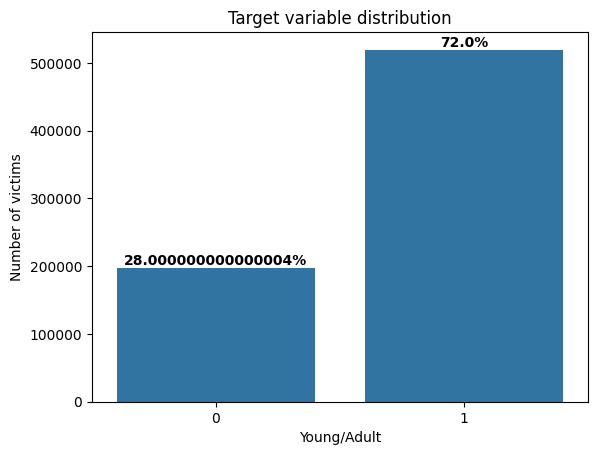

In [37]:
# Grafico

cantidad = len(df['Target'])

sns.countplot(data = df,
              x = "Target")
plt.xlabel('Young/Adult')
plt.ylabel('Number of victims')
plt.title('Target variable distribution')
ax = plt.gca()
for p in ax.patches:
    x_text = p.get_x() + p.get_width() / 2.0  # Calcula la posición x del texto
    y_text = p.get_height()  # Toma la altura de la columna
    ax.text(x_text, y_text, f'{str(round(int(y_text)/cantidad,2) * 100)}%', # Indica posición x e y, y texto a mostrar 
            ha = 'center', # Alineación horizontal 
            va = 'bottom',  # Alineación vertical
            fontsize = 10, color = 'black', fontweight = 'bold')
plt.show()

In [38]:
# Genero un dataframe vacío que voy a ir completando con cada IV

IV_df = pd.DataFrame(columns=['Variable', 'IV'])
IV_df.head()

,Variable,IV


In [39]:
# Information value para Vict Sex

tabla_IV = df.groupby('Vict Sex').agg(      
    Cant = ('Target', 'count'),
    Cant_Adultos = ('Target', 'sum'),    
    Tasa_Adultos = ('Target', 'mean')
).reset_index()
tabla_IV['Tasa_Jovenes'] = 1 - tabla_IV['Tasa_Adultos']
tabla_IV['Cant_Jovenes'] = tabla_IV['Cant'] - tabla_IV['Cant_Adultos']
tabla_IV['LN'] = np.log(tabla_IV['Tasa_Adultos'] / tabla_IV['Tasa_Jovenes'])
tabla_IV['Pct_Adultos'] = tabla_IV['Cant_Adultos'] / sum(tabla_IV['Cant_Adultos'])
tabla_IV['Pct_Jovenes'] = tabla_IV['Cant_Jovenes'] / sum(tabla_IV['Cant_Jovenes'])
tabla_IV['Resta'] = tabla_IV['Pct_Adultos'] - tabla_IV['Pct_Jovenes']
tabla_IV['IV'] = tabla_IV['Resta'] * tabla_IV['LN'] 
tabla_IV

,Vict Sex,Cant,Cant_Adultos,Tasa_Adultos,Tasa_Jovenes,Cant_Jovenes,LN,Pct_Adultos,Pct_Jovenes,Resta,IV
0,F,265313,249055,0.938721,0.061279,16258,2.729089,0.479296,0.082081,0.397214,1.084033
1,M,391637,264330,0.674936,0.325064,127307,0.730597,0.508692,0.642731,-0.134039,-0.097929
2,X,60749,6242,0.102751,0.897249,54507,-2.167028,0.012012,0.275188,-0.263175,0.570308


In [40]:
# Agrego la información a mi dataframe

nuevo_dato = {'Variable': 'Vict Sex', 'IV': sum(tabla_IV['IV'])}
IV_df = pd.concat([IV_df, pd.DataFrame([nuevo_dato])], ignore_index=True)
IV_df.head()

C:\Users\Maxi\AppData\Local\Temp\ipykernel_3076\3140120953.py:4: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  IV_df = pd.concat([IV_df, pd.DataFrame([nuevo_dato])], ignore_index=True)


,Variable,IV
0,Vict Sex,1.556413


In [41]:
# Information value para Area Grouped

tabla_IV = df.groupby('Area_Grouped').agg(      
    Cant = ('Target', 'count'),
    Cant_Adultos = ('Target', 'sum'),    
    Tasa_Adultos = ('Target', 'mean')
).reset_index()
tabla_IV['Tasa_Jovenes'] = 1 - tabla_IV['Tasa_Adultos']
tabla_IV['Cant_Jovenes'] = tabla_IV['Cant'] - tabla_IV['Cant_Adultos']
tabla_IV['LN'] = np.log(tabla_IV['Tasa_Adultos'] / tabla_IV['Tasa_Jovenes'])
tabla_IV['Pct_Adultos'] = tabla_IV['Cant_Adultos'] / sum(tabla_IV['Cant_Adultos'])
tabla_IV['Pct_Jovenes'] = tabla_IV['Cant_Jovenes'] / sum(tabla_IV['Cant_Jovenes'])
tabla_IV['Resta'] = tabla_IV['Pct_Adultos'] - tabla_IV['Pct_Jovenes']
tabla_IV['IV'] = tabla_IV['Resta'] * tabla_IV['LN'] 
tabla_IV

,Area_Grouped,Cant,Cant_Adultos,Tasa_Adultos,Tasa_Jovenes,Cant_Jovenes,LN,Pct_Adultos,Pct_Jovenes,Resta,IV
0,Central,252517,181264,0.717829,0.282171,71253,0.933718,0.348835,0.359733,-0.010898,-0.010176
1,North,179159,128476,0.717106,0.282894,50683,0.930152,0.247247,0.255882,-0.008635,-0.008032
2,South,153703,107519,0.699524,0.300476,46184,0.845034,0.206916,0.233168,-0.026252,-0.022184
3,West,132320,102368,0.773640,0.226360,29952,1.228978,0.197003,0.151218,0.045785,0.056269


In [42]:
# Agrego la información a mi dataframe

nuevo_dato = {'Variable': 'Area_Grouped', 'IV': sum(tabla_IV['IV'])}

IV_df = pd.concat([IV_df, pd.DataFrame([nuevo_dato])], ignore_index=True)

IV_df.head()

,Variable,IV
0,Vict Sex,1.556413
1,Area_Grouped,0.015877


In [43]:
# Information value para Time Class

tabla_IV = df.groupby('Time_Class').agg(      
    Cant = ('Target', 'count'),
    Cant_Adultos = ('Target', 'sum'),    
    Tasa_Adultos = ('Target', 'mean')
).reset_index()
tabla_IV['Tasa_Jovenes'] = 1 - tabla_IV['Tasa_Adultos']
tabla_IV['Cant_Jovenes'] = tabla_IV['Cant'] - tabla_IV['Cant_Adultos']
tabla_IV['LN'] = np.log(tabla_IV['Tasa_Adultos'] / tabla_IV['Tasa_Jovenes'])
tabla_IV['Pct_Adultos'] = tabla_IV['Cant_Adultos'] / sum(tabla_IV['Cant_Adultos'])
tabla_IV['Pct_Jovenes'] = tabla_IV['Cant_Jovenes'] / sum(tabla_IV['Cant_Jovenes'])
tabla_IV['Resta'] = tabla_IV['Pct_Adultos'] - tabla_IV['Pct_Jovenes']
tabla_IV['IV'] = tabla_IV['Resta'] * tabla_IV['LN'] 
tabla_IV

C:\Users\Maxi\AppData\Local\Temp\ipykernel_3076\2719489979.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla_IV = df.groupby('Time_Class').agg(


,Time_Class,Cant,Cant_Adultos,Tasa_Adultos,Tasa_Jovenes,Cant_Jovenes,LN,Pct_Adultos,Pct_Jovenes,Resta,IV
0,Afternoon,226571,160917,0.710228,0.289772,65654,0.896490,0.309678,0.331465,-0.021787,-0.019532
1,Morning,181822,137997,0.758968,0.241032,43825,1.147028,0.265569,0.221258,0.044311,0.050826
2,Night,309306,220713,0.713575,0.286425,88593,0.912810,0.424753,0.447277,-0.022524,-0.020560


In [44]:
# Agrego la información a mi dataframe

nuevo_dato = {'Variable': 'Time_Class', 'IV': sum(tabla_IV['IV'])}
IV_df = pd.concat([IV_df, pd.DataFrame([nuevo_dato])], ignore_index=True)
IV_df.head()

,Variable,IV
0,Vict Sex,1.556413
1,Area_Grouped,0.015877
2,Time_Class,0.010734


In [45]:
# Information value para Day of Week

tabla_IV = df.groupby('Day_of_Week').agg(      
    Cant = ('Target', 'count'),
    Cant_Adultos = ('Target', 'sum'),    
    Tasa_Adultos = ('Target', 'mean')
).reset_index()
tabla_IV['Tasa_Jovenes'] = 1 - tabla_IV['Tasa_Adultos']
tabla_IV['Cant_Jovenes'] = tabla_IV['Cant'] - tabla_IV['Cant_Adultos']
tabla_IV['LN'] = np.log(tabla_IV['Tasa_Adultos'] / tabla_IV['Tasa_Jovenes'])
tabla_IV['Pct_Adultos'] = tabla_IV['Cant_Adultos'] / sum(tabla_IV['Cant_Adultos'])
tabla_IV['Pct_Jovenes'] = tabla_IV['Cant_Jovenes'] / sum(tabla_IV['Cant_Jovenes'])
tabla_IV['Resta'] = tabla_IV['Pct_Adultos'] - tabla_IV['Pct_Jovenes']
tabla_IV['IV'] = tabla_IV['Resta'] * tabla_IV['LN'] 
tabla_IV

,Day_of_Week,Cant,Cant_Adultos,Tasa_Adultos,Tasa_Jovenes,Cant_Jovenes,LN,Pct_Adultos,Pct_Jovenes,Resta,IV
0,Friday,102891,74175,0.720909,0.279091,28716,0.948973,0.142747,0.144978,-0.002231,-0.002117
1,Monday,113075,80995,0.716294,0.283706,32080,0.926155,0.155871,0.161961,-0.006090,-0.005640
2,Saturday,92165,67912,0.736852,0.263148,24253,1.029672,0.130694,0.122445,0.008248,0.008493
3,Sunday,90992,67457,0.741351,0.258649,23535,1.053002,0.129818,0.118820,0.010998,0.011581
4,Thursday,104301,75065,0.719696,0.280304,29236,0.942954,0.144459,0.147603,-0.003144,-0.002964
5,Tuesday,108217,77717,0.718159,0.281841,30500,0.935347,0.149563,0.153984,-0.004421,-0.004136
6,Wednesday,106058,76306,0.719474,0.280526,29752,0.941855,0.146848,0.150208,-0.003360,-0.003165


In [46]:
# Agrego la información a mi dataframe

nuevo_dato = {'Variable': 'Day_of_Week', 'IV': sum(tabla_IV['IV'])}
IV_df = pd.concat([IV_df, pd.DataFrame([nuevo_dato])], ignore_index=True)
IV_df.head()

,Variable,IV
0,Vict Sex,1.556413
1,Area_Grouped,0.015877
2,Time_Class,0.010734
3,Day_of_Week,0.002052


In [47]:
# Information value para Crime Grouped

tabla_IV = df.groupby('Crime_Grouped').agg(      
    Cant = ('Target', 'count'),
    Cant_Adultos = ('Target', 'sum'),    
    Tasa_Adultos = ('Target', 'mean')
).reset_index()
tabla_IV['Tasa_Jovenes'] = 1 - tabla_IV['Tasa_Adultos']
tabla_IV['Cant_Jovenes'] = tabla_IV['Cant'] - tabla_IV['Cant_Adultos']
tabla_IV['LN'] = np.log(tabla_IV['Tasa_Adultos'] / tabla_IV['Tasa_Jovenes'])
tabla_IV['Pct_Adultos'] = tabla_IV['Cant_Adultos'] / sum(tabla_IV['Cant_Adultos'])
tabla_IV['Pct_Jovenes'] = tabla_IV['Cant_Jovenes'] / sum(tabla_IV['Cant_Jovenes'])
tabla_IV['Resta'] = tabla_IV['Pct_Adultos'] - tabla_IV['Pct_Jovenes']
tabla_IV['IV'] = tabla_IV['Resta'] * tabla_IV['LN'] 
tabla_IV

,Crime_Grouped,Cant,Cant_Adultos,Tasa_Adultos,Tasa_Jovenes,Cant_Jovenes,LN,Pct_Adultos,Pct_Jovenes,Resta,IV
0,Major Crime,50677,41972,0.828226,0.171774,8705,1.573105,0.080773,0.043949,0.036825,0.057929
1,Minor Crime,370602,300488,0.810811,0.189189,70114,1.455285,0.578276,0.353982,0.224294,0.326412
2,Moderate Crime,296420,177167,0.597689,0.402311,119253,0.395846,0.340950,0.602069,-0.261119,-0.103363


In [48]:
# Agrego la información a mi dataframe

nuevo_dato = {'Variable': 'Crime_Grouped', 'IV': sum(tabla_IV['IV'])}
IV_df = pd.concat([IV_df, pd.DataFrame([nuevo_dato])], ignore_index=True)
IV_df.head()

,Variable,IV
0,Vict Sex,1.556413
1,Area_Grouped,0.015877
2,Time_Class,0.010734
3,Day_of_Week,0.002052
4,Crime_Grouped,0.280978


In [49]:
# Information value para Descent Grouped

tabla_IV = df.groupby('Descent_Grouped').agg(      
    Cant = ('Target', 'count'),
    Cant_Adultos = ('Target', 'sum'),    
    Tasa_Adultos = ('Target', 'mean')
).reset_index()
tabla_IV['Tasa_Jovenes'] = 1 - tabla_IV['Tasa_Adultos']
tabla_IV['Cant_Jovenes'] = tabla_IV['Cant'] - tabla_IV['Cant_Adultos']
tabla_IV['LN'] = np.log(tabla_IV['Tasa_Adultos'] / tabla_IV['Tasa_Jovenes'])
tabla_IV['Pct_Adultos'] = tabla_IV['Cant_Adultos'] / sum(tabla_IV['Cant_Adultos'])
tabla_IV['Pct_Jovenes'] = tabla_IV['Cant_Jovenes'] / sum(tabla_IV['Cant_Jovenes'])
tabla_IV['Resta'] = tabla_IV['Pct_Adultos'] - tabla_IV['Pct_Jovenes']
tabla_IV['IV'] = tabla_IV['Resta'] * tabla_IV['LN'] 
tabla_IV

,Descent_Grouped,Cant,Cant_Adultos,Tasa_Adultos,Tasa_Jovenes,Cant_Jovenes,LN,Pct_Adultos,Pct_Jovenes,Resta,IV
0,Main Ethnic Groups,565291,434523,0.768671,0.231329,130768,1.200824,0.836221,0.660204,0.176017,0.211365
1,Other Ethnic Minorities,28262,27525,0.973923,0.026077,737,3.620262,0.052971,0.003721,0.049250,0.178297
2,Unknown or Not Specified,124146,57579,0.463801,0.536199,66567,-0.145051,0.110808,0.336075,-0.225266,0.032675


In [50]:
# Agrego la información a mi dataframe

nuevo_dato = {'Variable': 'Descent_Grouped', 'IV': sum(tabla_IV['IV'])}
IV_df = pd.concat([IV_df, pd.DataFrame([nuevo_dato])], ignore_index=True)
IV_df.head()

,Variable,IV
0,Vict Sex,1.556413
1,Area_Grouped,0.015877
2,Time_Class,0.010734
3,Day_of_Week,0.002052
4,Crime_Grouped,0.280978


In [51]:
# Information value para Weapon Grouped

tabla_IV = df.groupby('Weapon_Grouped').agg(      
    Cant = ('Target', 'count'),
    Cant_Adultos = ('Target', 'sum'),    
    Tasa_Adultos = ('Target', 'mean')
).reset_index()
tabla_IV['Tasa_Jovenes'] = 1 - tabla_IV['Tasa_Adultos']
tabla_IV['Cant_Jovenes'] = tabla_IV['Cant'] - tabla_IV['Cant_Adultos']
tabla_IV['LN'] = np.log(tabla_IV['Tasa_Adultos'] / tabla_IV['Tasa_Jovenes'])
tabla_IV['Pct_Adultos'] = tabla_IV['Cant_Adultos'] / sum(tabla_IV['Cant_Adultos'])
tabla_IV['Pct_Jovenes'] = tabla_IV['Cant_Jovenes'] / sum(tabla_IV['Cant_Jovenes'])
tabla_IV['Resta'] = tabla_IV['Pct_Adultos'] - tabla_IV['Pct_Jovenes']
tabla_IV['IV'] = tabla_IV['Resta'] * tabla_IV['LN'] 
tabla_IV

,Weapon_Grouped,Cant,Cant_Adultos,Tasa_Adultos,Tasa_Jovenes,Cant_Jovenes,LN,Pct_Adultos,Pct_Jovenes,Resta,IV
0,Firearms,30247,23827,0.787748,0.212252,6420,1.311401,0.045854,0.032412,0.013442,0.017627
1,Others,662286,473651,0.715176,0.284824,188635,0.920657,0.911521,0.952356,-0.040835,-0.037595
2,Ropes/Sharp Weapons,25166,22149,0.880116,0.119884,3017,1.993529,0.042625,0.015232,0.027393,0.054609


In [52]:
# Agrego la información a mi dataframe

nuevo_dato = {'Variable': 'Weapon_Grouped', 'IV': sum(tabla_IV['IV'])}
IV_df = pd.concat([IV_df, pd.DataFrame([nuevo_dato])], ignore_index=True)
IV_df.head()

,Variable,IV
0,Vict Sex,1.556413
1,Area_Grouped,0.015877
2,Time_Class,0.010734
3,Day_of_Week,0.002052
4,Crime_Grouped,0.280978


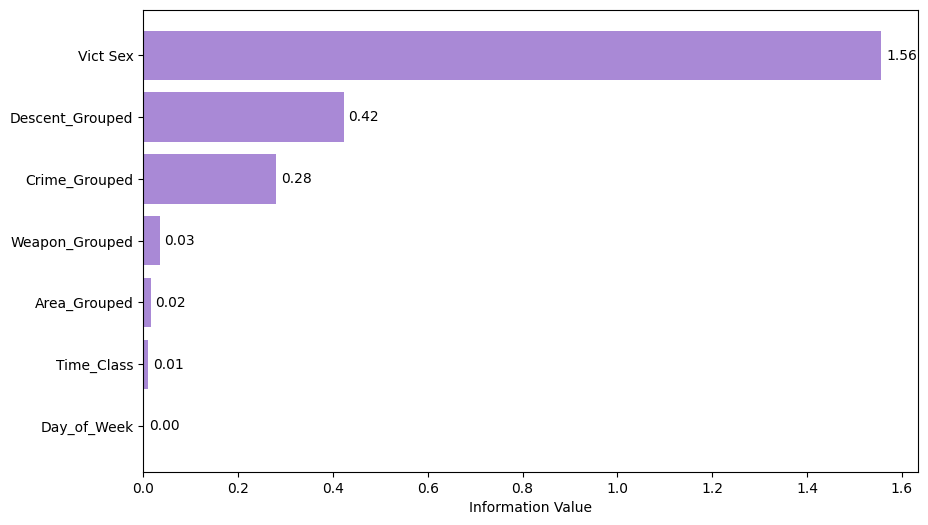

In [53]:
# Grafico el information value de cada variable

IV_df = IV_df.sort_values(by='IV', ascending=False)
plt.figure(figsize=(10, 6))  
bars = plt.barh(IV_df['Variable'], 
                IV_df['IV'],
                color='#A989D6')
for bar, iv in zip(bars, IV_df['IV']):
    plt.text(bar.get_width() + 0.01, 
             bar.get_y() + bar.get_height()/2, 
             f'{iv:.2f}', 
             va='center')
plt.xlabel('Information Value')
plt.gca().invert_yaxis()
plt.show()


Conclusión: utilizaré para mis modelos las features "Vict Sex", "Descent Grouped" y "Crime Grouped" porque demostraron tener una fuerte relación predictiva con la variable objetivo. 

## Modelo 1: Árbol de Decisión

Árbol de Decisión:
|--- Is_Female <= 0.50
|   |--- Moderate_Crime <= 0.50
|   |   |--- Main_Ethnic <= 0.50
|   |   |   |--- Other_Ethnic <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- Other_Ethnic >  0.50
|   |   |   |   |--- class: 1
|   |   |--- Main_Ethnic >  0.50
|   |   |   |--- Minor_Crime <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- Minor_Crime >  0.50
|   |   |   |   |--- class: 1
|   |--- Moderate_Crime >  0.50
|   |   |--- Other_Ethnic <= 0.50
|   |   |   |--- Main_Ethnic <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- Main_Ethnic >  0.50
|   |   |   |   |--- class: 0
|   |   |--- Other_Ethnic >  0.50
|   |   |   |--- class: 1
|--- Is_Female >  0.50
|   |--- Major_Crime <= 0.50
|   |   |--- Minor_Crime <= 0.50
|   |   |   |--- Other_Ethnic <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- Other_Ethnic >  0.50
|   |   |   |   |--- class: 1
|   |   |--- Minor_Crime >  0.50
|   |   |   |--- Other_Ethnic <= 0.50
|   |   |   |   |--- class: 1
|   |   

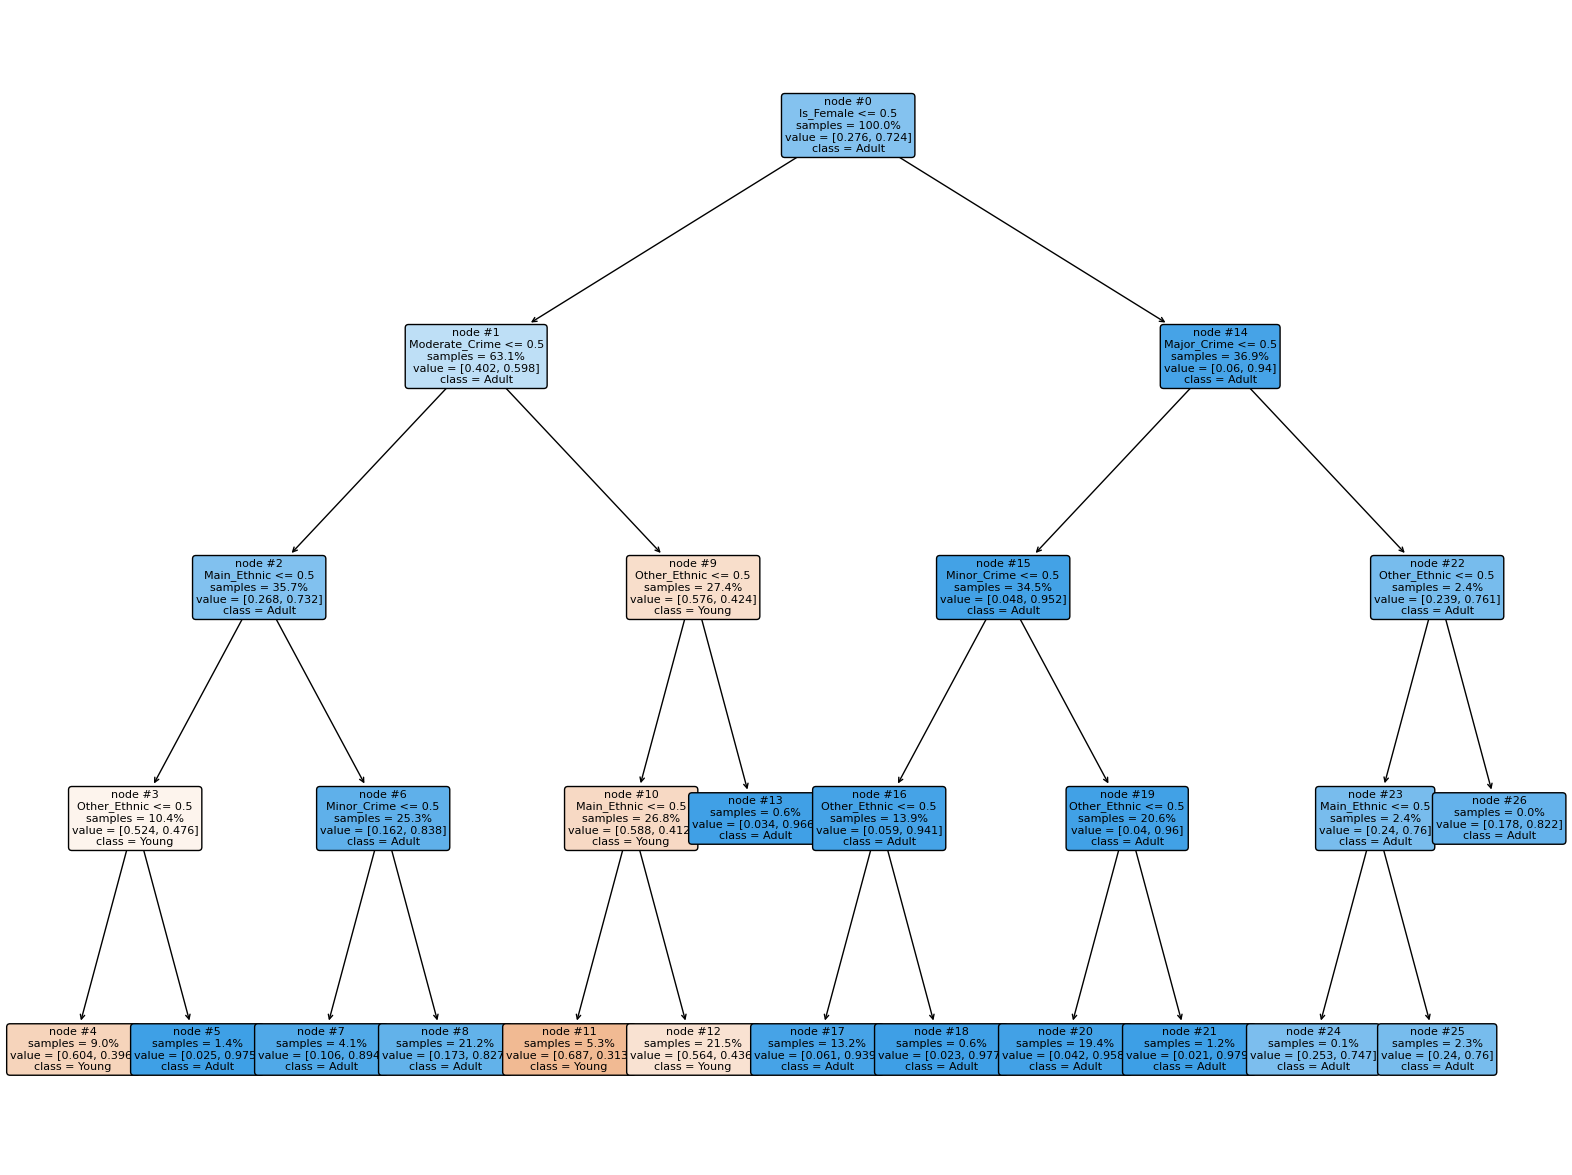

In [54]:
# Convierto mis variables categóricas en numéricas

df['Is_Female'] = (df['Vict Sex'] == 'F').astype(int)
df['Main_Ethnic'] = (df['Descent_Grouped'] == 'Main Ethnic Groups').astype(int)
df['Other_Ethnic'] = (df['Descent_Grouped'] == 'Other Ethnic Minorities').astype(int)
df['Minor_Crime'] = (df['Crime_Grouped'] == 'Minor Crime').astype(int)
df['Moderate_Crime'] = (df['Crime_Grouped'] == 'Moderate Crime').astype(int)
df['Major_Crime'] = (df['Crime_Grouped'] == 'Major Crime').astype(int)

# Defino la matriz predictores y el vector target

X = df[['Is_Female', 'Main_Ethnic', 'Other_Ethnic', 'Minor_Crime', 'Moderate_Crime', 'Major_Crime']]
y = df['Target']

# Divido los datos en conjuntos de entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

# Aplico el modelo

clf = DecisionTreeClassifier(random_state=1234, 
                             criterion='gini', 
                             splitter='best', 
                             max_depth=4, 
                             min_samples_leaf=20)
clf.features_names = ['Is_Female', 'Main_Ethnic', 'Other_Ethnic', 'Minor_Crime', 'Moderate_Crime', 'Major_Crime'] 

# Entreno el modelo en el conjunto de entrenamiento

model = clf.fit(X_train, y_train)

# Imprimo el árbol de decisión resultante

print("Árbol de Decisión:")
text_representation = tree.export_text(model, feature_names=list(X.columns))
print(text_representation)

# Grafico 

plt.figure(figsize=(20, 15))  
plot_tree(clf, 
          filled=True, 
          rounded=True, 
          class_names=['Young', 'Adult'], 
          feature_names=['Is_Female', 'Main_Ethnic', 'Other_Ethnic', 'Minor_Crime', 'Moderate_Crime', 'Major_Crime'], 
          impurity=False,
          proportion=True,
          node_ids=True,
          fontsize=8)  
plt.show()


In [55]:
# Genero las predicciones en los conjuntos de entrenamiento y prueba

train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)

In [56]:
# Calculo las métricas de evaluación para el conjunto de entrenamiento

train_accuracy = accuracy_score(y_train, train_predictions)
train_classification_report = classification_report(y_train, train_predictions)
train_confusion_matrix = confusion_matrix(y_train, train_predictions)

# Calculo las métricas de evaluación para el conjunto de prueba

test_accuracy = accuracy_score(y_test, test_predictions)
test_classification_report = classification_report(y_test, test_predictions)
test_confusion_matrix = confusion_matrix(y_test, test_predictions)

In [57]:
# Imprimo las métricas para el conjunto de entrenamiento

print("Métricas para el conjunto de entrenamiento:")
print("Accuracy:", train_accuracy)
print("Classification Report:\n", train_classification_report)

# Imprimo las métricas para el conjunto de prueba

print("\nMétricas para el conjunto de prueba:")
print("Accuracy:", test_accuracy)
print("Classification Report:\n", test_classification_report)

Métricas para el conjunto de entrenamiento:
Accuracy: 0.7902322702129226
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.77      0.67    138545
           1       0.90      0.80      0.85    363844

    accuracy                           0.79    502389
   macro avg       0.75      0.78      0.76    502389
weighted avg       0.82      0.79      0.80    502389


Métricas para el conjunto de prueba:
Accuracy: 0.7900979982351028
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.77      0.67     59527
           1       0.90      0.80      0.85    155783

    accuracy                           0.79    215310
   macro avg       0.75      0.78      0.76    215310
weighted avg       0.81      0.79      0.80    215310



Confusion Matrix:
 [[106460  32085]
 [ 73300 290544]]
Confusion Matrix:
 [[ 45665  13862]
 [ 31332 124451]]


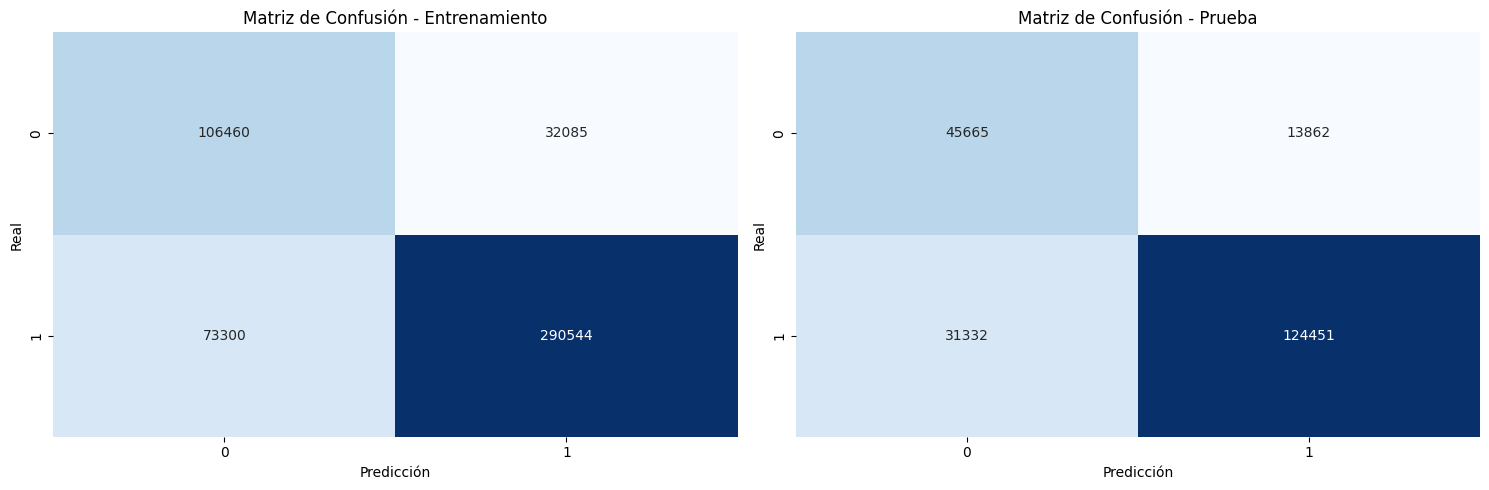

In [58]:
# Imprimo y grafico matrices de confusión para ambos

print("Confusion Matrix:\n", train_confusion_matrix)
print("Confusion Matrix:\n", test_confusion_matrix) 

# Grafico las matrices de confusión para ambos

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.heatmap(train_confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matriz de Confusión - Entrenamiento")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.subplot(1, 2, 2)
sns.heatmap(test_confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matriz de Confusión - Prueba")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

### Conclusión:

El modelo de árbol de decisión muestra una precisión consistente tanto en el conjunto de entrenamiento como en el de prueba, con una precisión global cercana al 79%. Puede predecir eficazmente tanto crímenes menores como mayores, lo que sugiere una buena capacidad de generalización a datos nuevos. Este modelo puede ser útil en la planificación de estrategias policiales y de prevención del delito,

## Modelo 2: Random Forest

In [59]:
# Convierto mis variables categóricas en numéricas

df['Is_Female'] = (df['Vict Sex'] == 'F').astype(int)
df['Main_Ethnic'] = (df['Descent_Grouped'] == 'Main Ethnic Groups').astype(int)
df['Other_Ethnic'] = (df['Descent_Grouped'] == 'Other Ethnic Minorities').astype(int)
df['Minor_Crime'] = (df['Crime_Grouped'] == 'Minor Crime').astype(int)
df['Moderate_Crime'] = (df['Crime_Grouped'] == 'Moderate Crime').astype(int)
df['Major_Crime'] = (df['Crime_Grouped'] == 'Major Crime').astype(int)

# Defino la matriz predictores y el vector target

X = df[['Is_Female', 'Main_Ethnic', 'Other_Ethnic', 'Minor_Crime', 'Moderate_Crime', 'Major_Crime']]
y = df['Target']

# Divido los datos en conjuntos de entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

In [60]:
# Inicializar el clasificador Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [61]:
# Entrenar el modelo con los datos de entrenamiento
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [62]:
# Hacer predicciones en los conjuntos de entrenamiento y prueba
train_predictions = rf_model.predict(X_train)
test_predictions = rf_model.predict(X_test)

In [63]:
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, test_predictions)
print("Accuracy:", accuracy)

# Calcular la precisión por clase
precision = precision_score(y_test, test_predictions, average=None)
print("Precision por clase:", precision)

# Calcular el recall por clase
recall = recall_score(y_test, test_predictions, average=None)
print("Recall por clase:", recall)

# Calcular el F1-score por clase
f1 = f1_score(y_test, test_predictions, average=None)
print("F1-score por clase:", f1)

# Calcular el AUC-ROC
auc_roc = roc_auc_score(y_test, test_predictions)
print("AUC-ROC:", auc_roc)



Accuracy: 0.7912544702986392
Precision por clase: [0.59595694 0.89775924]
Recall por clase: [0.76069683 0.802931  ]
F1-score por clase: [0.66832461 0.84770137]
AUC-ROC: 0.7818139134117047


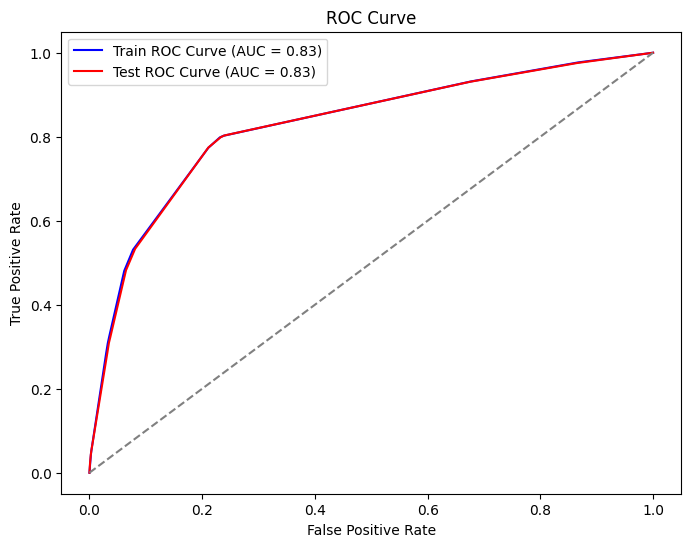

In [64]:
# Obtener las probabilidades de pertenencia a la clase positiva para ambos conjuntos
train_probs = rf_model.predict_proba(X_train)[:, 1]
test_probs = rf_model.predict_proba(X_test)[:, 1]

# Calcular la tasa de verdaderos positivos (recall) y la tasa de falsos positivos para ambos conjuntos
train_fpr, train_tpr, _ = roc_curve(y_train, train_probs)
test_fpr, test_tpr, _ = roc_curve(y_test, test_probs)

# Calcular el área bajo la curva ROC para ambos conjuntos
train_auc = roc_auc_score(y_train, train_probs)
test_auc = roc_auc_score(y_test, test_probs)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(train_fpr, train_tpr, label=f'Train ROC Curve (AUC = {train_auc:.2f})', color='blue')
plt.plot(test_fpr, test_tpr, label=f'Test ROC Curve (AUC = {test_auc:.2f})', color='red')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


### Conclusión:

El modelo de Random Forest mostró un rendimiento prometedor en la predicción del objetivo deseado, con una precisión global de aproximadamente 0.79 en el conjunto de prueba. Al evaluar por clase, se observa que la precisión para la clase positiva (Adulto) es alta, con un valor de alrededor de 0.90, mientras que para la clase negativa (Joven) es más moderada, alrededor de 0.60. Además, el modelo presenta un buen equilibrio entre la tasa de verdaderos positivos (Recall) y la tasa de falsos positivos, como lo indican los valores de AUC-ROC de aproximadamente 0.83. Estos resultados sugieren que el modelo es capaz de distinguir eficazmente entre las clases objetivo y puede ser útil en la clasificación de casos en función de las características proporcionadas.

## Optimización

In [66]:
# Convierte las variables categóricas en numéricas
df['Is_Female'] = (df['Vict Sex'] == 'F').astype(int)
df['Main_Ethnic'] = (df['Descent_Grouped'] == 'Main Ethnic Groups').astype(int)
df['Other_Ethnic'] = (df['Descent_Grouped'] == 'Other Ethnic Minorities').astype(int)
df['Minor_Crime'] = (df['Crime_Grouped'] == 'Minor Crime').astype(int)
df['Moderate_Crime'] = (df['Crime_Grouped'] == 'Moderate Crime').astype(int)
df['Major_Crime'] = (df['Crime_Grouped'] == 'Major Crime').astype(int)

# Define la matriz de características (predictores) y el vector objetivo
X = df[['Is_Female', 'Main_Ethnic', 'Other_Ethnic', 'Minor_Crime', 'Moderate_Crime', 'Major_Crime']]
y = df['Target']

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [70]:
# Definir el modelo base
rf_model = RandomForestClassifier()

# Definir la cuadrícula de hiperparámetros a buscar
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inicializar la búsqueda en cuadrícula
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Entrenar el modelo utilizando la búsqueda en cuadrícula
grid_search.fit(X_train, y_train)